In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append('../')
import dataset_wrapper as util

In [5]:
import ee
ee.Authenticate() 
ee.Initialize()

In [3]:
import geopandas as gpd
dataframe = gpd.read_file('/data2/hkaman/Data/CDL/California_Counties.geojson')
dataframe = dataframe.to_crs(epsg=4326)
dataframe

,OBJECTID,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,Shape__Area,Shape__Length,geometry
0,1,Alameda County,California,06,001,06001,3.084661e+09,4.484258e+05,"MULTIPOLYGON (((-122.19112 37.69298, -122.1910..."
1,2,Alpine County,California,06,003,06003,3.156006e+09,2.755651e+05,"POLYGON ((-119.90061 38.93077, -119.88726 38.9..."
2,3,Amador County,California,06,005,06005,2.562531e+09,3.595932e+05,"POLYGON ((-120.07765 38.70889, -120.07771 38.7..."
3,4,Butte County,California,06,007,06007,7.340033e+09,5.259746e+05,"POLYGON ((-121.40463 40.14665, -121.40489 40.1..."
4,5,Calaveras County,California,06,009,06009,4.356209e+09,3.670057e+05,"POLYGON ((-120.07247 38.50916, -120.07254 38.4..."
5,6,Colusa County,California,06,011,06011,4.990775e+09,3.860411e+05,"POLYGON ((-122.10655 39.41443, -122.10278 39.4..."
6,7,Contra Costa County,California,06,013,06013,3.075717e+09,4.515488e+05,"MULTIPOLYGON (((-122.37203 37.90142, -122.3717..."
7,8,Del Norte County,California,06,015,06015,4.715185e+09,4.214900e+05,"MULTIPOLYGON (((-124.11103 41.59347, -124.1112..."
8,9,El Dorado County,California,06,017,06017,7.624185e+09,4.677944e+05,"POLYGON ((-119.90433 38.93333, -119.90442 38.9..."
9,10,Fresno County,California,06,019,06019,2.430318e+10,1.104287e+06,"POLYGON ((-119.00148 37.57090, -119.00097 37.5..."


### Dwonloading CDL

In [6]:
for year in range(2008, 2009):
    util.DownloadCDLEE(year = year, county_name= 'Alameda')()

Export task Alameda_2008 started.


### Sample Visualization

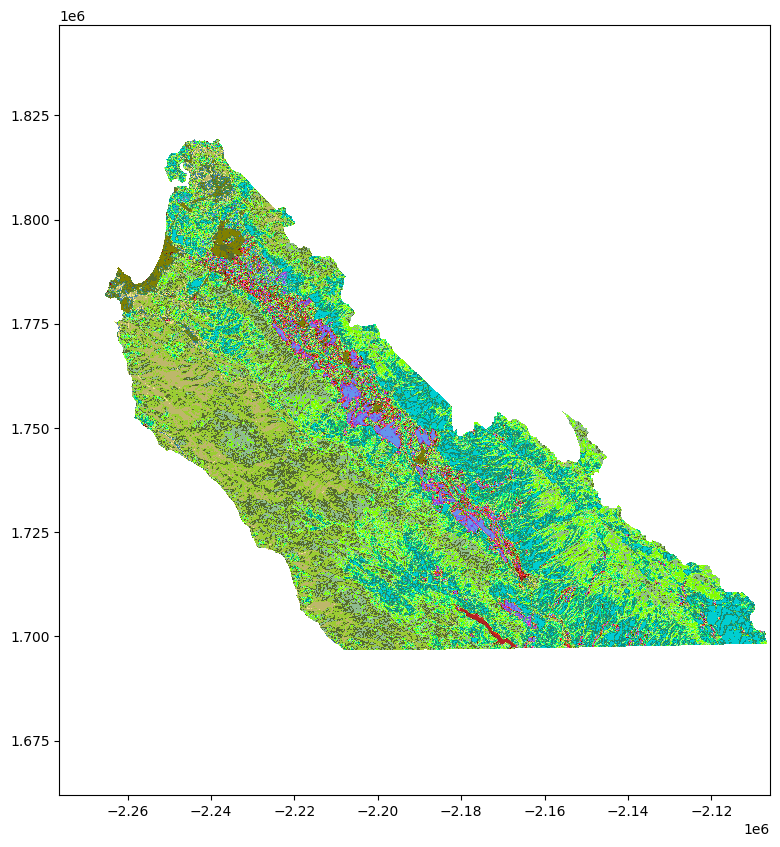

<Axes: >

In [27]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show
from matplotlib.colors import ListedColormap
import numpy as np
# Path to CDL raster and county boundary file
cdl_path = '/data2/hkaman/Data/FoundationModel/Monterey/CDL/2008/Monterey_2008.tif'
from rasterio.warp import calculate_default_transform, reproject, Resampling
# Load the CDL raster
# Target CRS
target_crs = 'EPSG:32610'

# Open the source raster
with rasterio.open(cdl_path) as src:
    src_crs = src.crs  # Original CRS
    src_transform = src.transform  # Original transform
    src_width = src.width
    src_height = src.height

    # Calculate the new transform and dimensions for the target CRS
    transform, width, height = calculate_default_transform(
        src_crs, target_crs, src_width, src_height, *src.bounds
    )

    # Create an empty array to hold the reprojected data
    reprojected_data = np.empty((height, width), dtype=src.meta['dtype'])

    # Reproject the data
    reproject(
        source=src.read(1),  # Read the first band
        destination=reprojected_data,
        src_transform=src_transform,
        src_crs=src_crs,
        dst_transform=transform,
        dst_crs=target_crs,
        resampling=Resampling.nearest
    )

cmap = ListedColormap([util.cdl_colors[key] for key in sorted(util.cdl_colors.keys())])

# # Create a masked array to handle NoData values
nodata_value = reprojected_data['nodata'] if 'nodata' in reprojected_data else 0
cdl_data_masked = np.ma.masked_where(reprojected_data == nodata_value, reprojected_data)

# # Plot the CDL
plt.figure(figsize=(12, 10))
show(cdl_data_masked, cmap=cmap, transform=src.transform)

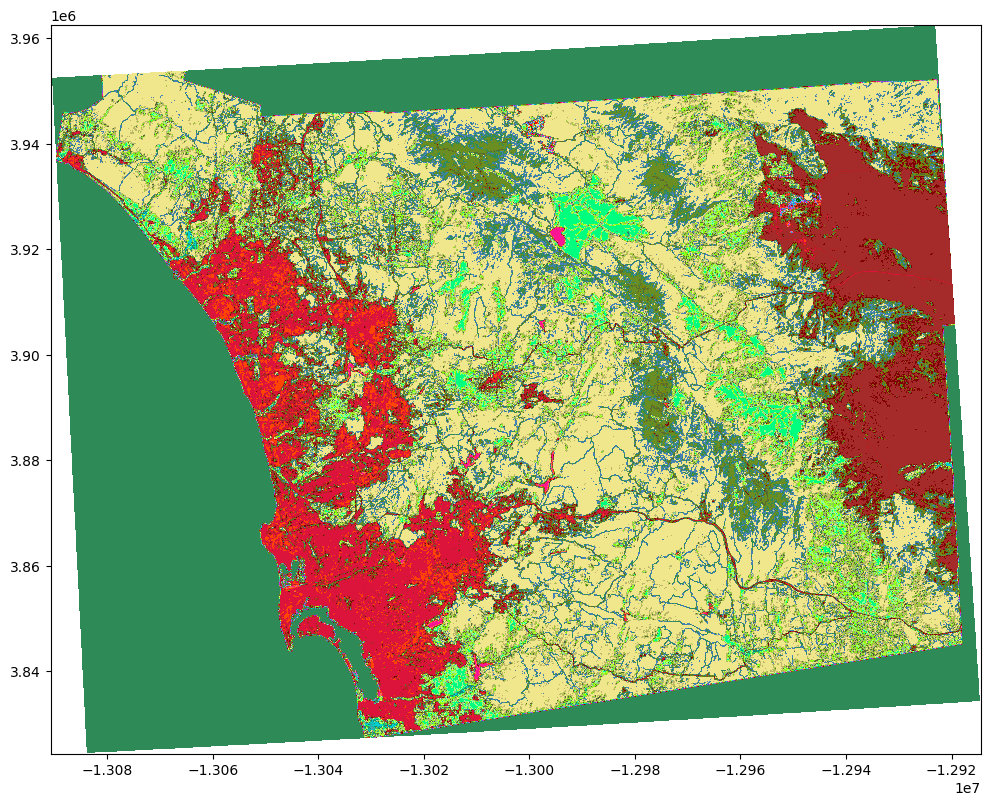

<Axes: >

In [31]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show
from matplotlib.colors import ListedColormap
import numpy as np
# Path to CDL raster and county boundary file
cdl_path = '/data2/hkaman/Data/FoundationModel/Inputs/SanDiego/Raw/CDL/2010/San_Diego_2010.tif'
from rasterio.warp import calculate_default_transform, reproject, Resampling
# Load the CDL raster
# Target CRS
target_crs = 'EPSG:32610'

# Open the source raster
with rasterio.open(cdl_path) as src:
    src_crs = src.crs  # Original CRS
    src_transform = src.transform  # Original transform
    src_width = src.width
    src_height = src.height

    # Calculate the new transform and dimensions for the target CRS
    transform, width, height = calculate_default_transform(
        src_crs, target_crs, src_width, src_height, *src.bounds
    )

    # Create an empty array to hold the reprojected data
    reprojected_data = np.empty((height, width), dtype=src.meta['dtype'])

    # Reproject the data
    reproject(
        source=src.read(1),  # Read the first band
        destination=reprojected_data,
        src_transform=src_transform,
        src_crs=src_crs,
        dst_transform=transform,
        dst_crs=target_crs,
        resampling=Resampling.nearest
    )

cmap = ListedColormap([util.CDL_COLORS[key] for key in sorted(util.CDL_COLORS.keys())])

# # Create a masked array to handle NoData values
nodata_value = reprojected_data['nodata'] if 'nodata' in reprojected_data else 0
cdl_data_masked = np.ma.masked_where(reprojected_data == nodata_value, reprojected_data)

# # Plot the CDL
plt.figure(figsize=(12, 10))
show(cdl_data_masked, cmap=cmap, transform=src.transform)

In [10]:
dataframe = gpd.read_file(util.CA_COUNTIES_SHAPEFILE_DIR)
dataframe

,OBJECTID,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,Shape__Area,Shape__Length,geometry
0,1,Alameda County,California,06,001,06001,3.084661e+09,4.484258e+05,"MULTIPOLYGON (((-122.19112 37.69298, -122.1910..."
1,2,Alpine County,California,06,003,06003,3.156006e+09,2.755651e+05,"POLYGON ((-119.90061 38.93077, -119.88726 38.9..."
2,3,Amador County,California,06,005,06005,2.562531e+09,3.595932e+05,"POLYGON ((-120.07765 38.70889, -120.07771 38.7..."
3,4,Butte County,California,06,007,06007,7.340033e+09,5.259746e+05,"POLYGON ((-121.40463 40.14665, -121.40489 40.1..."
4,5,Calaveras County,California,06,009,06009,4.356209e+09,3.670057e+05,"POLYGON ((-120.07247 38.50916, -120.07254 38.4..."
5,6,Colusa County,California,06,011,06011,4.990775e+09,3.860411e+05,"POLYGON ((-122.10655 39.41443, -122.10278 39.4..."
6,7,Contra Costa County,California,06,013,06013,3.075717e+09,4.515488e+05,"MULTIPOLYGON (((-122.37203 37.90142, -122.3717..."
7,8,Del Norte County,California,06,015,06015,4.715185e+09,4.214900e+05,"MULTIPOLYGON (((-124.11103 41.59347, -124.1112..."
8,9,El Dorado County,California,06,017,06017,7.624185e+09,4.677944e+05,"POLYGON ((-119.90433 38.93333, -119.90442 38.9..."
9,10,Fresno County,California,06,019,06019,2.430318e+10,1.104287e+06,"POLYGON ((-119.00148 37.57090, -119.00097 37.5..."


In [3]:
import os
import rasterio
from rasterio.mask import mask
import geopandas as gpd

def clip_cdl_by_counties(year: str, county_names: list):
    """
    Clips a CDL GeoTIFF by a list of county geometries and saves each one.

    Parameters:
    - cdl_path: str, path to the CDL GeoTIFF file.
    - counties_gdf: GeoDataFrame, contains geometries and a column 'county_name'.
    - county_names: list of str, list of county names to clip and save.
    - output_dir: str, directory to save the clipped rasters.

    Returns:
    - None

    """ 

    dataframe = gpd.read_file(util.CA_COUNTIES_SHAPEFILE_DIR)
    cdl_path  = f'/data2/hkaman/Data/YieldBenchmark/CDLs/{year}/CA_CDL_{year}.TIF'
    with rasterio.open(cdl_path) as src:
        raster_crs = src.crs
        dataframe = dataframe.to_crs(raster_crs)

        for county in county_names:
            output_dir = f'/data2/hkaman/Data/YieldBenchmark/counties/{county}/Raw/CDL/{year}'
            os.makedirs(output_dir, exist_ok=True)


            normalized_county_name = county.strip().title() + " County"
            county_row = dataframe[dataframe["NAME"] == normalized_county_name]

            county_geom = county_row.geometry.values[0]
            try:
                out_image, out_transform = mask(
                    dataset = src,
                    shapes = [county_geom],
                    crop = True,
                    nodata = src.nodata
                )

                out_meta = src.meta.copy()
                out_meta.update({
                    "driver": "GTiff",
                    "height": out_image.shape[1],
                    "width": out_image.shape[2],
                    "transform": out_transform
                })

                out_path = os.path.join(output_dir, f"{county.replace(' ', '_')}_{year}.tif")
                with rasterio.open(out_path, "w", **out_meta) as dest:
                    dest.write(out_image)

                print(f"Saved {out_path}")
            except Exception as e:
                print(f"Failed to clip {county}: {e}")

In [5]:
# county_names = ['Inyo', 'Kern', 'Madera', 'Mariposa', 'Mono', 'Orange', 'Riverside', 'San Benito', 'San Bernardino', 
#                 'San Diego', 'San Luis Obispo', 'San Mateo', 'Santa Clara', 'Santa Cruz', 'Stanislaus', 'Sutter', 'Tulare', 
#                 'Tuolumne', 'Ventura'] # 
county_names = ['Trinity'] # 

for year in range (2008, 2023):
    if year != 2012:
        clip_cdl_by_counties(year = f'{year}', county_names = county_names)

Saved /data2/hkaman/Data/YieldBenchmark/counties/Trinity/Raw/CDL/2008/Trinity_2008.tif
Saved /data2/hkaman/Data/YieldBenchmark/counties/Trinity/Raw/CDL/2009/Trinity_2009.tif
Saved /data2/hkaman/Data/YieldBenchmark/counties/Trinity/Raw/CDL/2010/Trinity_2010.tif
Saved /data2/hkaman/Data/YieldBenchmark/counties/Trinity/Raw/CDL/2011/Trinity_2011.tif
Saved /data2/hkaman/Data/YieldBenchmark/counties/Trinity/Raw/CDL/2013/Trinity_2013.tif
Saved /data2/hkaman/Data/YieldBenchmark/counties/Trinity/Raw/CDL/2014/Trinity_2014.tif
Saved /data2/hkaman/Data/YieldBenchmark/counties/Trinity/Raw/CDL/2015/Trinity_2015.tif
Saved /data2/hkaman/Data/YieldBenchmark/counties/Trinity/Raw/CDL/2016/Trinity_2016.tif
Saved /data2/hkaman/Data/YieldBenchmark/counties/Trinity/Raw/CDL/2017/Trinity_2017.tif
Saved /data2/hkaman/Data/YieldBenchmark/counties/Trinity/Raw/CDL/2018/Trinity_2018.tif
Saved /data2/hkaman/Data/YieldBenchmark/counties/Trinity/Raw/CDL/2019/Trinity_2019.tif
Saved /data2/hkaman/Data/YieldBenchmark/cou